# Import and set up

In [3]:
%%time 
# Necessary librarys
import os # it's a operational system library, to set some informations
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
#import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

Wall time: 14.3 s


In [22]:
np.random.rand()

0.9130494791750101

In [4]:
RANDOM_SEED = 9999
np.random.seed(RANDOM_SEED)

In [23]:
%%time 
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = 'C:/Users/johnk/Desktop/Grad School/4. Fall 2018/1. MSDS 458 - Deep Learning/6. Homework/Assignment 5/input/' # you can change to your local 

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.20 

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and np.random.rand()> p # Number of rows that will be imported randomly
                    )
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

Wall time: 0 ns


In [24]:
# %%time is used to calculate the timing of code chunk execution #
# We will import the data using the name and extension that will be concatenated with dir_path
df_train = json_read("train_v2.csv") 

ParserError: Error tokenizing data. C error: no error message set

In [7]:
%%time 
# The same to test dataset
df_test = json_read("test_v2.csv") 

TypeError: 'module' object is not callable

In [6]:
df_train["date"] = pd.to_datetime(df_train["date"],format="%Y%m%d")
df_train["visitStartTime"] = pd.to_datetime(df_train["visitStartTime"],unit='s')

df_test["date"] = pd.to_datetime(df_test["date"],format="%Y%m%d")
df_test["visitStartTime"] = pd.to_datetime(df_test["visitStartTime"],unit='s')

# Data Exploration

In [7]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,2017-10-17 00:53:33,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
1,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,1259490915281096752,"[{'hitNumber': '1', 'time': '0', 'hour': '7', ...",Not Socially Engaged,1508165159,2,2017-10-16 14:45:59,Safari,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Paid Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,6135613929977117121,"[{'hitNumber': '1', 'time': '0', 'hour': '8', ...",Not Socially Engaged,1508166431,10,2017-10-16 15:07:11,Safari,...,NaN,NaN,NaN,NaN,"""google + redesign/Accessories March 17"" All U...",NaN,(Remarketing/Content targeting),cpc,NaN,google
3,Referral,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,4372943625982217246,"[{'hitNumber': '1', 'time': '0', 'hour': '6', ...",Not Socially Engaged,1508160406,1,2017-10-16 13:26:46,Safari,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/analytics/web/,analytics.google.com
4,Organic Search,"[{'index': '4', 'value': 'APAC'}]",2017-10-16,5634653258298299672,"[{'hitNumber': '1', 'time': '0', 'hour': '3', ...",Not Socially Engaged,1508150872,3,2017-10-16 10:47:52,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [8]:
df_train['totals.hits'] = df_train['totals.hits'].astype('float32')
df_train['visitNumber'] = df_train['visitNumber'].astype('float32')
df_train['trafficSource.adwordsClickInfo.page'] = df_train['trafficSource.adwordsClickInfo.page'].astype('float32').fillna(0)
df_train['totals.bounces'] = df_train['totals.bounces'].astype('float32').fillna(0)
df_train['totals.newVisits'] = df_train['totals.newVisits'].astype('float32').fillna(0)
df_train['totals.pageviews'] = df_train['totals.pageviews'].astype('float32')
df_train['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].astype('float32').fillna(0)
df_train['totals.visits'] = df_train['totals.visits'].astype('float32')
df_train['setind'] = 'train'

In [9]:
df_test['totals.hits'] = df_test['totals.hits'].astype('float32')
df_test['visitNumber'] = df_test['visitNumber'].astype('float32')
df_test['trafficSource.adwordsClickInfo.page'] = df_test['trafficSource.adwordsClickInfo.page'].astype('float32').fillna(0)
df_test['totals.bounces'] = df_test['totals.bounces'].astype('float32').fillna(0)
df_test['totals.newVisits'] = df_test['totals.newVisits'].astype('float32').fillna(0)
df_test['totals.pageviews'] = df_test['totals.pageviews'].astype('float32')
df_test['totals.transactionRevenue'] = df_test['totals.transactionRevenue'].astype('float32').fillna(0)
df_test['totals.visits'] = df_test['totals.visits'].astype('float32')
df_test['setind'] = 'test'

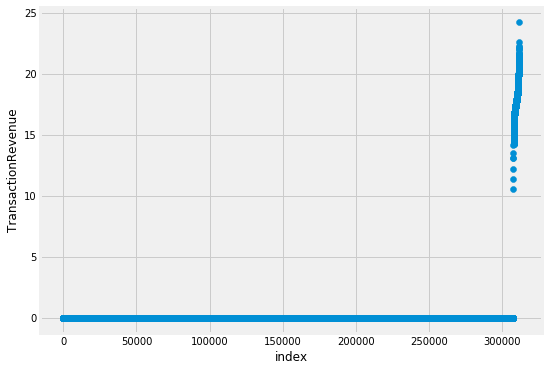

In [10]:
gdf = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341945 entries, 0 to 341944
Data columns (total 60 columns):
channelGrouping                                      341945 non-null object
customDimensions                                     341945 non-null object
date                                                 341945 non-null datetime64[ns]
fullVisitorId                                        341945 non-null object
hits                                                 341945 non-null object
socialEngagementType                                 341945 non-null object
visitId                                              341945 non-null int64
visitNumber                                          341945 non-null float32
visitStartTime                                       341945 non-null datetime64[ns]
device.browser                                       341945 non-null object
device.browserSize                                   341945 non-null object
device.browserVersion                

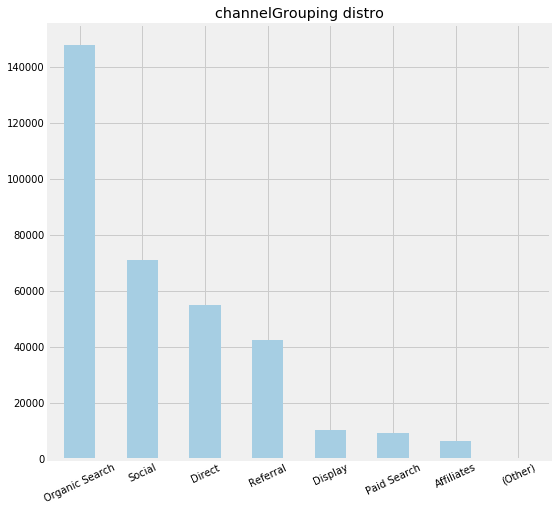

In [12]:
df_train.channelGrouping.value_counts().plot(kind="bar",title="channelGrouping distro",figsize=(8,8),rot=25,colormap='Paired')

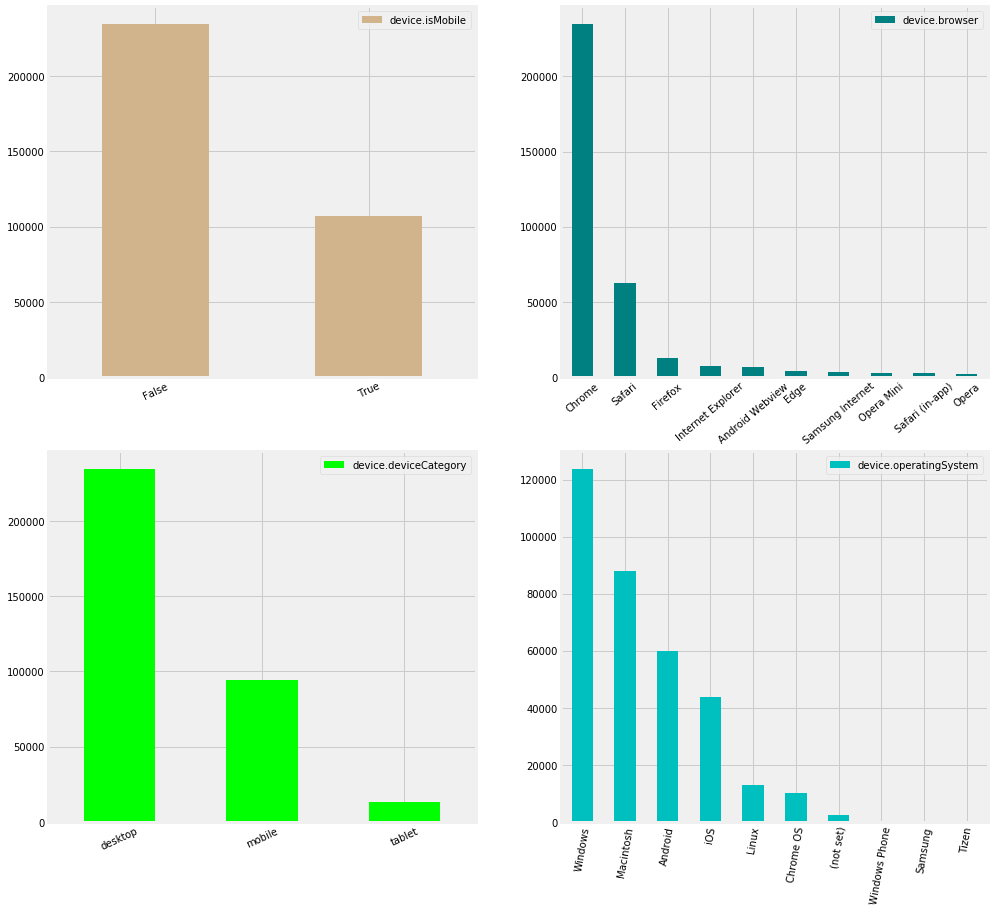

In [13]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
df_train["device.isMobile"].value_counts().plot(kind="bar",ax=axes[0][0],rot=25,legend="isMobile",color='tan')
df_train["device.browser"].value_counts().head(10).plot(kind="bar",ax=axes[0][1],rot=40,legend="browser",color='teal')
df_train["device.deviceCategory"].value_counts().head(10).plot(kind="bar",ax=axes[1][0],rot=25,legend="deviceCategory",color='lime')
df_train["device.operatingSystem"].value_counts().head(10).plot(kind="bar",ax=axes[1][1],rot=80,legend="operatingSystem",color='c')

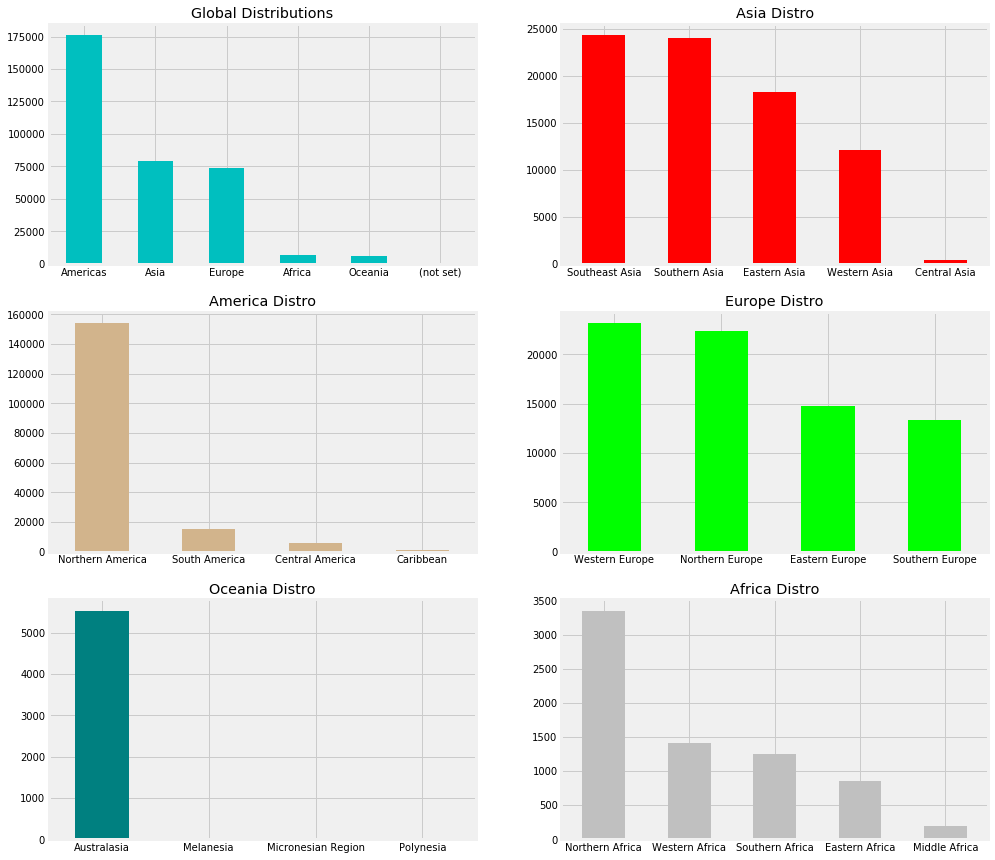

In [14]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
df_train["geoNetwork.continent"].value_counts().plot(kind="bar",ax=axes[0][0],title="Global Distributions",rot=0,color="c")
df_train[df_train["geoNetwork.continent"] == "Americas"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[1][0], title="America Distro",rot=0,color="tan")
df_train[df_train["geoNetwork.continent"] == "Asia"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[0][1], title="Asia Distro",rot=0,color="r")
df_train[df_train["geoNetwork.continent"] == "Europe"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax=axes[1][1],  title="Europe Distro",rot=0,color="lime")
df_train[df_train["geoNetwork.continent"] == "Oceania"]["geoNetwork.subContinent"].value_counts().plot(kind="bar",ax = axes[2][0], title="Oceania Distro",rot=0,color="teal")
df_train[df_train["geoNetwork.continent"] == "Africa"]["geoNetwork.subContinent"].value_counts().plot(kind="bar" , ax=axes[2][1], title="Africa Distro",rot=0,color="silver")


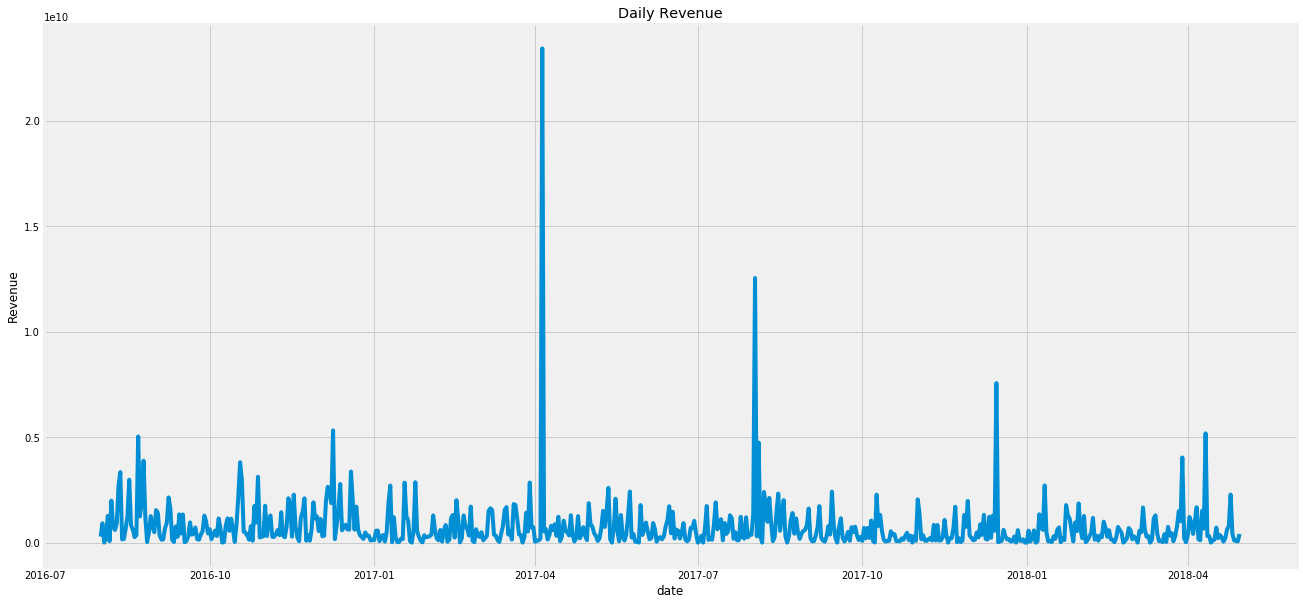

In [15]:
daily_df = df_train.groupby(by=["date"],axis = 0 ).sum()
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily Revenue")
axes.set_ylabel("Revenue")
axes.set_xlabel("date")
axes.plot(daily_df["totals.transactionRevenue"])

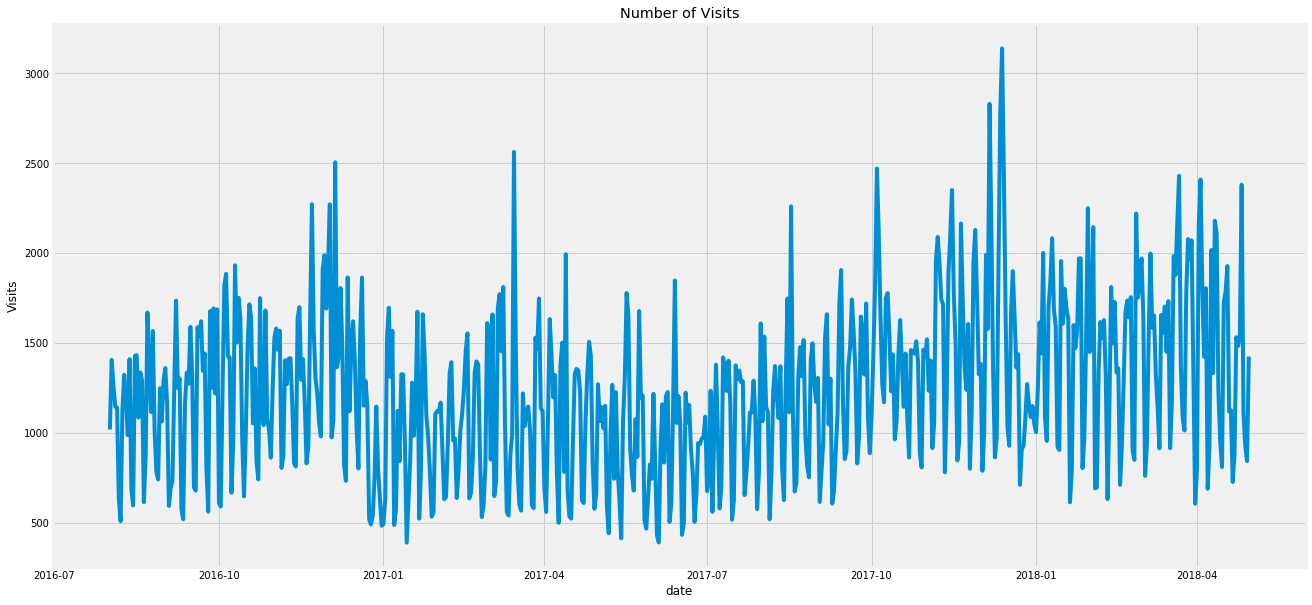

In [16]:
daily_df = df_train.groupby(by=["date"],axis = 0 ).sum()
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Number of Visits")
axes.set_ylabel("Visits")
axes.set_xlabel("date")
axes.plot(daily_df["visitNumber"])

# Feature Engineering and Data Prep

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [18]:
df = pd.concat([df_train,df_test])

df['revenue_ind'] = np.where(df['totals.transactionRevenue']>0, 1,0)

list_cols = ['visitNumber',
             'totals.bounces',
             'totals.hits',
             'totals.pageviews',
             'totals.newVisits',
             'totals.visits',
             'trafficSource.adwordsClickInfo.page',
             'channelGrouping',
             'socialEngagementType',
             'device.browser',
             'device.browserSize',
             'device.browserVersion',
             'device.deviceCategory',
             'device.flashVersion',
             'device.isMobile',
             'device.language',
             'device.mobileDeviceBranding',
             'device.mobileDeviceInfo',
             'device.mobileDeviceMarketingName',
             'device.mobileDeviceModel',
             'device.mobileInputSelector',
             'device.operatingSystem',
             'device.operatingSystemVersion',
             'device.screenColors',
             'device.screenResolution',
             'geoNetwork.city',
             'geoNetwork.continent',
             'geoNetwork.country',
             'trafficSource.adContent',
             'trafficSource.source',
             'setind', 
             'revenue_ind']

df = df.loc[:, list_cols]

In [19]:
def scale_em(series_name):
    tmp = min_max_scaler.fit_transform(df[series_name].values.reshape(-1,1))
    df[series_name] = tmp
    return

In [20]:
x = ['visitNumber','totals.hits','trafficSource.adwordsClickInfo.page',
          'totals.bounces', 'totals.newVisits', 'totals.pageviews','totals.visits']

for i in x:
    scale_em(i)

In [21]:
def oneHotEncode(df2,colNames):
    for col in colNames:
        if( df2[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df2[col],prefix=col)
            df2 = pd.concat([df2,dummies],axis=1)

            #drop the encoded column
            df2.drop([col],axis = 1 , inplace=True)
    return df2

In [22]:
df = oneHotEncode(df, ['channelGrouping',
                       'socialEngagementType',
                       'device.browser',
                       'device.browserSize',
                       'device.browserVersion',
                       'device.deviceCategory',
                       'device.flashVersion',
                       'device.isMobile',
                       'device.language',
                       'device.mobileDeviceBranding',
                       'device.mobileDeviceInfo',
                       'device.mobileDeviceMarketingName',
                       'device.mobileDeviceModel',
                       'device.mobileInputSelector',
                       'device.operatingSystem',
                       'device.operatingSystemVersion',
                       'device.screenColors',
                       'device.screenResolution',
                       'geoNetwork.city',
                       'geoNetwork.continent',
                       'geoNetwork.country',
                       'trafficSource.adContent',
                       'trafficSource.source'])

In [23]:
df_train.shape

(341945, 60)

In [24]:
df_test.shape

(80249, 60)

In [25]:
df_train = df[df['setind']=='train']
df_test = df[df['setind']=='test']

In [26]:
df_train.shape

(341945, 1714)

In [27]:
df_test.shape

(80249, 1714)

In [28]:
no_sale = df_train[df_train['revenue_ind'] != 1]
no_sale = no_sale.sample(len(df_train[df_train['revenue_ind'] == 1]))

yes_sale = df_train[df_train['revenue_ind'] == 1]

df_train2 = pd.concat([no_sale, yes_sale])

df_train2

,visitNumber,totals.bounces,totals.hits,totals.pageviews,totals.newVisits,totals.visits,trafficSource.adwordsClickInfo.page,device.isMobile,setind,revenue_ind,...,trafficSource.source_web.skype.com,trafficSource.source_web.whatsapp.com,trafficSource.source_wikihow.com,trafficSource.source_www4.bing.com,trafficSource.source_wx.qq.com,trafficSource.source_yahoo,trafficSource.source_yandex,trafficSource.source_youtube.com,trafficSource.source_youtube.thinkwithgoogle.com,trafficSource.source_zarchive.srv.cs.cmu.edu
336899,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.000,True,train,0,...,0,0,0,0,0,0,0,1,0,0
71316,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
285944,0.013487,0.0,0.008016,0.011696,0.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
280756,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
196696,0.000000,0.0,0.010020,0.011696,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
326992,0.000000,0.0,0.008016,0.011696,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
219429,0.000000,0.0,0.004008,0.005848,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
109758,0.000000,0.0,0.012024,0.017544,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
158787,0.000000,0.0,0.004008,0.005848,1.0,0.0,0.000,False,train,0,...,0,0,0,0,0,0,0,0,0,0
202669,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.000,True,train,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x_train = df_train2.drop(columns=['revenue_ind','setind'])
y_train = df_train2['revenue_ind']

In [30]:
x_test = df_test.drop(columns=['revenue_ind','setind'])
y_test = df_test['revenue_ind']

In [31]:
#https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

In [32]:
# Under Sampling

#len(df_train[df_train['revenue_ind'] == 1]) 

# Keras Machine Learning

In [33]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

from sklearn.metrics import confusion_matrix, accuracy_score, auc

Using TensorFlow backend.


Epoch 1/100
7526/7526 [==============================] - 6s 812us/step - loss: 0.6816 - acc: 0.6693
Epoch 2/100
7526/7526 [==============================] - 2s 249us/step - loss: 0.5632 - acc: 0.8097
Epoch 3/100
7526/7526 [==============================] - 2s 247us/step - loss: 0.3734 - acc: 0.8429
Epoch 4/100
7526/7526 [==============================] - 2s 245us/step - loss: 0.3189 - acc: 0.8647
Epoch 5/100
7526/7526 [==============================] - 2s 246us/step - loss: 0.2960 - acc: 0.8771
Epoch 6/100
7526/7526 [==============================] - 2s 261us/step - loss: 0.2801 - acc: 0.8844
Epoch 7/100
7526/7526 [==============================] - 2s 245us/step - loss: 0.2650 - acc: 0.8904
Epoch 8/100
7526/7526 [==============================] - 2s 241us/step - loss: 0.2489 - acc: 0.8966
Epoch 9/100
7526/7526 [==============================] - 2s 241us/step - loss: 0.2373 - acc: 0.9017
Epoch 10/100
7526/7526 [==============================] - 2s 238us/step - loss: 0.2245 - acc: 0.9092

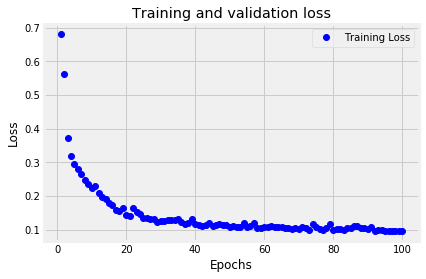

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               219264    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 230,273
Trainable params: 230,273
Non-trainable params: 0
_________________________________________________________________


,0,1
0,75243,4027
1,113,866


In [35]:
def model():
    # create model
    model = Sequential()
    model.add(layers.Dense(128, input_dim=1712, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = model()
history = model.fit(x_train,
                    y_train,
                    epochs = 100,
                    batch_size = 350,
                    verbose = True)

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
#plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model.summary()

pred = model.predict_classes(x_test)

matrix = pd.DataFrame(confusion_matrix(y_test,pred, labels = [x for x in range(0,2)]))
matrix

In [36]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [14]:
precision = 866/(4027+866)
print(precision)

0.17698753321070917


In [13]:
(75243+866)/(113+4027+75243+866)

0.9484105720943563

In [9]:
recall = 866/(113+866)
print(recall)

0.8845760980592441


In [11]:
f1 = 2 * ((percision*recall)/(precision+recall))
print(f1)

0.2949591280653951


In [37]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

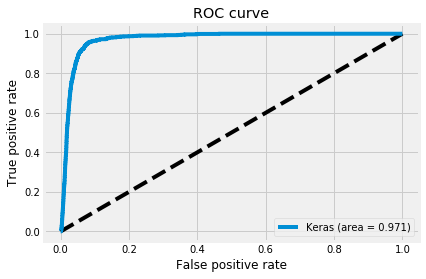

In [40]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()